In [1]:
import numpy as np
import pandas as pd
import astropy.io.fits as pyfits
import os
import sys
import glob

%matplotlib inline
import matplotlib.pyplot as plt

import ROOT

Welcome to JupyROOT 6.26/04


Read the root event file

In [2]:
outfilename = "scorefile.root"
ROOT.gROOT.Reset()
f = ROOT.TFile(outfilename)

tree = f.Get("Events")
tree_len = tree.GetEntries()

t_ID = np.zeros(tree_len, dtype=int)
t_ED = np.zeros(tree_len, dtype=float)
t_SI = np.zeros(tree_len, dtype=int)
t_XP = np.zeros(tree_len, dtype=float)
t_YP = np.zeros(tree_len, dtype=float)
t_ZP = np.zeros(tree_len, dtype=float)
t_TP = np.zeros(tree_len, dtype=float)
t_PP = np.zeros(tree_len, dtype=float)
t_EP = np.zeros(tree_len, dtype=float)
t_TI = np.zeros(tree_len, dtype=float)
t_Dx = np.zeros(tree_len, dtype=float)
t_Dy = np.zeros(tree_len, dtype=float)
t_Dz = np.zeros(tree_len, dtype=float)

for i, entry in enumerate(tree):
    t_ID[i] = entry.EventID
    t_ED[i] = entry.En_dep
    t_SI[i] = entry.Scint_ID
    t_XP[i] = entry.X_Primary
    t_YP[i] = entry.Y_Primary
    t_ZP[i] = entry.Z_Primary
    t_TP[i] = entry.Theta_Primary
    t_PP[i] = entry.Phi_Primary
    t_EP[i] = entry.En_Primary
    t_TI[i] = entry.Event_time
    t_Dx[i] = entry.X_Detected
    t_Dy[i] = entry.Y_Detected
    t_Dz[i] = entry.Z_Detected

Print some value

In [7]:
print('Nr of records: {}'.format(len(t_ID)))
print(f'The first 100 scintitor IDs: {t_SI[0:99]}')

Nr of records: 29288
The first 100 scintitor IDs: [132 130  21  20 109 114  18 122 113 125   3  16 115 103 113  61 102 130
 112  21  39  44  37 106  29 105   6 109 112 109  21 109  20 130 112 118
  10 111 121  48 127  27 111 111  34  28 101  39 105  46  48 116 123 113
  28  25 101 103  44 118  16 128  53   4   2 128  31 132  17  32  56 108
   5  11 126 110  43  45  50 115 116  15 121  45  37  33  49 110 119 111
 130 131 103 104  23  26  52  44 129]


Create a pandas data frame

In [8]:
data = {'EventID': t_ID, 'En_dep': t_ED, 'Scint_ID': t_SI, 'X_Primary': t_XP, 'Y_Primary': t_YP, 'Z_Primary': t_ZP,
        'Theta_Primary': t_TP, 'Phi_Primary': t_PP, 'En_Primary': t_EP, 'Event_time': t_TI, 'X_Detected': t_Dx,
       'Y_Detected': t_Dy, 'Z_Detected': t_Dz}
df = pd.DataFrame(data)
df

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,Event_time,X_Detected,Y_Detected,Z_Detected
0,13,3.866213,132,-0.334305,-2.881516,-8.0,180.0,0.0,60.0,0.0,-5.339152,-29.358992,-32.883976
1,21,2.765894,130,-1.988237,-2.698984,-8.0,180.0,0.0,60.0,0.0,-19.939152,-29.358992,-32.883976
2,27,1.283764,21,-3.384350,-0.479321,-8.0,180.0,0.0,60.0,0.0,-28.614152,-5.033992,-32.883976
3,27,0.082103,20,-3.384350,-0.479321,-8.0,180.0,0.0,60.0,0.0,-32.964151,-5.033992,-32.883976
4,39,4.661581,109,-5.433245,-2.326843,-8.0,180.0,0.0,60.0,0.0,-52.989151,-21.908993,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29283,119986,6.321932,127,-4.435996,-3.341547,-8.0,180.0,0.0,60.0,0.0,-41.839153,-29.358992,-32.883976
29284,119987,59.973450,101,0.771470,-2.362466,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
29285,119988,1.801825,20,-3.345066,-0.338918,-8.0,180.0,0.0,60.0,0.0,-32.964151,-5.033992,-32.883976
29286,119991,7.622100,130,-2.047166,-2.858219,-8.0,180.0,0.0,60.0,0.0,-19.939152,-29.358992,-32.883976


### Select the Scattterer (Scint_ID < 100) elements

In [11]:
df[df['Scint_ID'] < 100]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,Event_time,X_Detected,Y_Detected,Z_Detected
2,27,1.283764,21,-3.384350,-0.479321,-8.0,180.0,0.0,60.0,0.0,-28.614152,-5.033992,-32.883976
3,27,0.082103,20,-3.384350,-0.479321,-8.0,180.0,0.0,60.0,0.0,-32.964151,-5.033992,-32.883976
6,41,0.227954,18,-4.156040,-0.578073,-8.0,180.0,0.0,60.0,0.0,-41.664152,-5.033992,-32.883976
10,48,0.196490,3,-0.360018,-1.347149,-8.0,180.0,0.0,60.0,0.0,-14.964152,-9.383992,-32.883976
11,48,0.255890,16,-0.360018,-1.347149,-8.0,180.0,0.0,60.0,0.0,-1.914152,-13.733992,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29279,119958,8.548913,19,-3.709946,-0.569200,-8.0,180.0,0.0,60.0,0.0,-37.314152,-5.033992,-32.883976
29281,119966,6.270948,3,-1.340259,-0.911236,-8.0,180.0,0.0,60.0,0.0,-14.964152,-9.383992,-32.883976
29282,119978,7.970300,26,-4.153876,-1.284371,-8.0,180.0,0.0,60.0,0.0,-41.664152,-13.733992,-32.883976
29285,119988,1.801825,20,-3.345066,-0.338918,-8.0,180.0,0.0,60.0,0.0,-32.964151,-5.033992,-32.883976


Print the number of hits for each scaterer

In [98]:
for scatterer_ID in range(64):
   print(len(df[df['Scint_ID'] == scatterer_ID+1]))

197
214
200
223
195
177
196
211
181
195
192
184
179
185
222
190
211
185
191
191
200
202
177
169
199
181
190
207
166
185
164
188
178
178
199
161
182
207
210
188
193
211
230
233
197
207
194
187
193
185
202
213
186
194
182
177
198
203
190
180
190
154
201
208


In [29]:
# The first ID
df[df['Scint_ID'] == 1]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,Event_time,X_Detected,Y_Detected,Z_Detected
153,688,11.877226,1,-0.607023,-0.797087,-8.0,180.0,0.0,60.0,0.0,-1.914152,-18.083993,-32.883976
252,1035,5.045387,1,-1.085601,-2.824333,-8.0,180.0,0.0,60.0,0.0,-1.914152,-18.083993,-32.883976
372,1545,3.764597,1,-0.348489,-1.836255,-8.0,180.0,0.0,60.0,0.0,-1.914152,-18.083993,-32.883976
461,1885,11.040445,1,-0.074831,-1.746737,-8.0,180.0,0.0,60.0,0.0,-1.914152,-18.083993,-32.883976
519,2111,0.062393,1,1.293590,-0.932719,-8.0,180.0,0.0,60.0,0.0,-1.914152,-18.083993,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28813,118212,7.179734,1,-0.328241,-1.800898,-8.0,180.0,0.0,60.0,0.0,-1.914152,-18.083993,-32.883976
29075,119131,5.311930,1,-3.161524,-0.500221,-8.0,180.0,0.0,60.0,0.0,-1.914152,-18.083993,-32.883976
29087,119185,7.483249,1,-0.323720,-1.689940,-8.0,180.0,0.0,60.0,0.0,-1.914152,-18.083993,-32.883976
29125,119345,4.592846,1,-0.043092,-1.808296,-8.0,180.0,0.0,60.0,0.0,-1.914152,-18.083993,-32.883976


In [39]:
df[df['Scint_ID'] == 1].iloc[0,:]

EventID          688.000000
En_dep            11.877226
Scint_ID           1.000000
X_Primary         -0.607023
Y_Primary         -0.797087
Z_Primary         -8.000000
Theta_Primary    180.000000
Phi_Primary        0.000000
En_Primary        60.000000
Event_time         0.000000
X_Detected        -1.914152
Y_Detected       -18.083993
Z_Detected       -32.883976
Name: 153, dtype: float64

Create the lookup table (Scint_ID, X_detected, Y_detected, Z_detected)

In [65]:
Scint_ID = []
X_Detected = []
Y_Detected = []
Z_Detected = []
for i in range(64):
    Scint_ID.append(int(df[df['Scint_ID'] == i+1].iloc[0,:]['Scint_ID']))
    X_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['X_Detected'])
    Y_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Y_Detected'])
    Z_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Z_Detected'])

# create the data frame
data = {'Scint_ID': Scint_ID, 'X_Detected': X_Detected, 'Y_Detected': Y_Detected,
       'Z_Detected': Z_Detected}
look_up_table = pd.DataFrame(data)
look_up_table

,Scint_ID,X_Detected,Y_Detected,Z_Detected
0,1,-1.914152,-18.083993,-32.883976
1,2,-14.964152,-5.033992,-32.883976
2,3,-14.964152,-9.383992,-32.883976
3,4,-14.964152,-13.733992,-32.883976
4,5,-14.964152,-18.083993,-32.883976
...,...,...,...,...
59,60,-37.364151,12.966008,-32.883976
60,61,-37.364151,8.616008,-32.883976
61,62,-41.714151,21.666007,-32.883976
62,63,-41.714151,17.316008,-32.883976


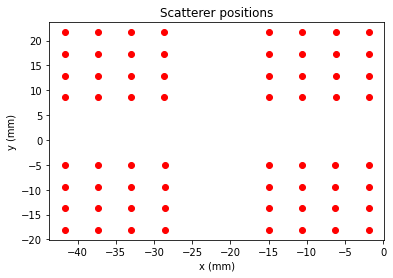

In [95]:
position_x = []
position_y = []
for i in range(len(look_up_table)):
    position_x.append(look_up_table.iloc[i,1])
    position_y.append(look_up_table.iloc[i,2])

plt.title('Scatterer positions')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')    
plt.plot(position_x, position_y, 'o', color='red');

### Select the absorber (Scint_ID > 100) elements

In [99]:
df[df['Scint_ID'] > 100]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,Event_time,X_Detected,Y_Detected,Z_Detected
0,13,3.866213,132,-0.334305,-2.881516,-8.0,180.0,0.0,60.0,0.0,-5.339152,-29.358992,-32.883976
1,21,2.765894,130,-1.988237,-2.698984,-8.0,180.0,0.0,60.0,0.0,-19.939152,-29.358992,-32.883976
4,39,4.661581,109,-5.433245,-2.326843,-8.0,180.0,0.0,60.0,0.0,-52.989151,-21.908993,-32.883976
5,41,10.757518,114,-4.156040,-0.578073,-8.0,180.0,0.0,60.0,0.0,-52.989151,-0.008992,-32.883976
7,46,12.162685,122,-1.543107,3.164141,-8.0,180.0,0.0,60.0,0.0,-16.339152,33.041008,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29278,119957,55.198787,101,1.366415,-0.908029,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
29280,119964,12.329512,125,0.257216,-2.899662,-8.0,180.0,0.0,60.0,0.0,1.960848,-29.358992,-32.883976
29283,119986,6.321932,127,-4.435996,-3.341547,-8.0,180.0,0.0,60.0,0.0,-41.839153,-29.358992,-32.883976
29284,119987,59.973450,101,0.771470,-2.362466,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976


Print the number of hits for each absorber

In [105]:
for scatterer_ID in range(32):
   print(len(df[df['Scint_ID'] == scatterer_ID+101]))

546
477
513
520
535
509
513
513
501
514
584
534
559
505
570
528
541
508
540
522
509
552
538
540
518
501
556
542
521
522
541
558


In [108]:
# The first ID
df[df['Scint_ID'] == 101]

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,Event_time,X_Detected,Y_Detected,Z_Detected
46,223,6.064405,101,0.752482,-2.335505,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
56,248,9.974369,101,1.035398,-2.356743,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
131,608,3.265496,101,1.081272,-1.737567,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
143,640,2.046796,101,1.154359,-2.747471,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
151,684,5.692105,101,-2.954740,-0.168008,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29215,119724,11.146092,101,1.051812,-2.556599,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
29251,119858,11.263152,101,0.961451,-2.739916,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
29266,119896,1.718843,101,1.274876,0.904335,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976
29278,119957,55.198787,101,1.366415,-0.908029,-8.0,180.0,0.0,60.0,0.0,9.410848,-25.508993,-32.883976


In [109]:
df[df['Scint_ID'] == 101].iloc[0,:]

EventID          223.000000
En_dep             6.064405
Scint_ID         101.000000
X_Primary          0.752482
Y_Primary         -2.335505
Z_Primary         -8.000000
Theta_Primary    180.000000
Phi_Primary        0.000000
En_Primary        60.000000
Event_time         0.000000
X_Detected         9.410848
Y_Detected       -25.508993
Z_Detected       -32.883976
Name: 46, dtype: float64

Create the lookup table (Scint_ID, X_detected, Y_detected, Z_detected)

In [111]:
Scint_ID = []
X_Detected = []
Y_Detected = []
Z_Detected = []
for i in range(32):
    Scint_ID.append(int(df[df['Scint_ID'] == i+101].iloc[0,:]['Scint_ID']))
    X_Detected.append(df[df['Scint_ID'] == i+101].iloc[0,:]['X_Detected'])
    Y_Detected.append(df[df['Scint_ID'] == i+101].iloc[0,:]['Y_Detected'])
    Z_Detected.append(df[df['Scint_ID'] == i+101].iloc[0,:]['Z_Detected'])

# create the data frame
data = {'Scint_ID': Scint_ID, 'X_Detected': X_Detected, 'Y_Detected': Y_Detected,
       'Z_Detected': Z_Detected}
look_up_table = pd.DataFrame(data)
look_up_table

,Scint_ID,X_Detected,Y_Detected,Z_Detected
0,101,9.410848,-25.508993,-32.883976
1,102,9.410848,25.591007,-32.883976
2,103,9.410848,18.291008,-32.883976
3,104,9.410848,10.991008,-32.883976
4,105,9.410848,3.691008,-32.883976
5,106,9.410848,-3.608992,-32.883976
6,107,9.410848,-10.908992,-32.883976
7,108,9.410848,-18.208992,-32.883976
8,109,-52.989151,-21.908993,-32.883976
9,110,-52.989151,29.191009,-32.883976


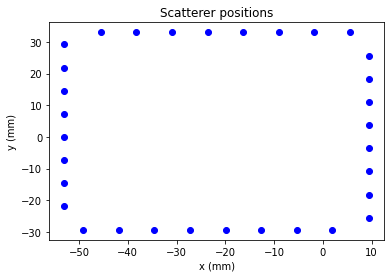

In [112]:
position_x = []
position_y = []
for i in range(len(look_up_table)):
    position_x.append(look_up_table.iloc[i,1])
    position_y.append(look_up_table.iloc[i,2])

plt.title('Scatterer positions')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')    
plt.plot(position_x, position_y, 'o', color='blue');

### The energy distribution

In [113]:
# Group by ''EventID' column 
grouped = df.groupby('EventID')

# Perform aggregation
sum_by_category = grouped['En_dep'].sum()

sum_by_category

EventID
13         3.866213
21         2.765894
27         1.365867
39         4.661581
41        10.985472
            ...    
119986     6.321932
119987    59.973450
119988     1.801825
119991     7.622100
119994     7.437946
Name: En_dep, Length: 25006, dtype: float64

Plot the spectrum

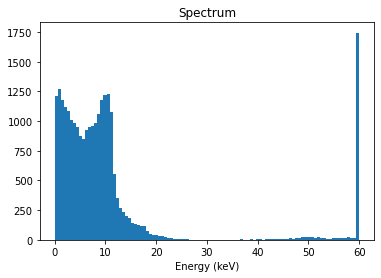

In [114]:
plt.hist(sum_by_category, bins=100);
plt.title('Spectrum');
plt.xlabel('Energy (keV)');